In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# abbreviation for plotting functions in certain range
def plot(f, xRange, *args, **kw):
    yRange = np.fromiter(map(f,xRange), np.float)
    plt.plot(xRange,yRange, *args, **kw)

## Generate data - reversible bimolecular reaction
System is $A+B\leftrightarrow C$ with rates $\kappa_1$ and $\kappa_2$. 
The analytic solution to this is of the form
$$a(t) = a_\mathrm{eq} + z \,t^{-3/2}$$ ????

In [40]:
import generate_tools.kinetic_monte_carlo as kmc

n_species = 3
n_boxes = 1
rate_1 = 2.
rate_2 = 4.
diffusivity_a = np.array([[0.]])
diffusivity_b = np.array([[0.]])
diffusivity_c = np.array([[0.]])
diffusivity = np.array([diffusivity_a, diffusivity_b, diffusivity_c])
init_state = np.array([[50, 50, 0]])
species_names = ["A", "B", "C"]
system = kmc.ReactionDiffusionSystem(diffusivity, 3, 1, init_state, species_names=species_names)
system.add_fusion("A", "B", "C", np.array([rate_1]))
system.add_fission("C", "A", "B", np.array([rate_2]))
system.simulate(200)

[KMC] [2017-06-30 19:06:47] [INFO] Simulate for 200 steps


In [41]:
def get_counts_config(n_frames):
    counts, times = system.convert_events_to_time_series(n_frames=n_frames)
    # flatten out spatial dimension and convert to float
    counts = np.sum(counts, axis=1, dtype=np.float64)
    config = system.get_trajectory_config()
    return counts, times, config

#cnts_30, times_30, cfg_30 = get_counts_config(30)
#cnts_50, times_50, cfg_50 = get_counts_config(50)
#cnts_100, times_100, cfg_100 = get_counts_config(100)
#cnts_500, times_500, cfg_500 = get_counts_config(500)
cnts_5000, times_5000, cfg_5000 = get_counts_config(5000)

(0, 0.1)

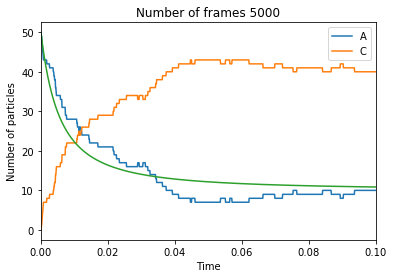

In [42]:
def plot_counts(counts, times, config):
    plt.plot(times, counts[:, config.types["A"]], label="A")
    #plt.plot(times, counts[:, config.types["B"]], label="B")
    plt.plot(times, counts[:, config.types["C"]], label="C")
    #plot(lambda x: analytic_model_a(x, 2.), 
    #     times, label=r"true model $a(t) = \frac{a(0)}{1 + a(0)\, \kappa\, t}$")
    plt.legend(loc="best")
    plt.xlabel("Time")
    plt.ylabel("Number of particles")
    plt.title("Number of frames " + str(len(counts)))

#plot_counts(cnts_30, times_30, cfg_30); plt.show();
#plot_counts(cnts_50, times_50, cfg_50); plt.show();
#plot_counts(cnts_100, times_100, cfg_100); plt.show();
plot_counts(cnts_5000, times_5000, cfg_5000)#; plt.show();
plot(lambda x: 10.+40.*np.power((120.*x+1.), -3./2.), times_5000, label=r"blub")
plt.xlim(0,0.1)